<h3> Discretization theory to approximate and infinite square well with a linear term V(x) = alpha x </h3>

ValueError: x and y must be the same size

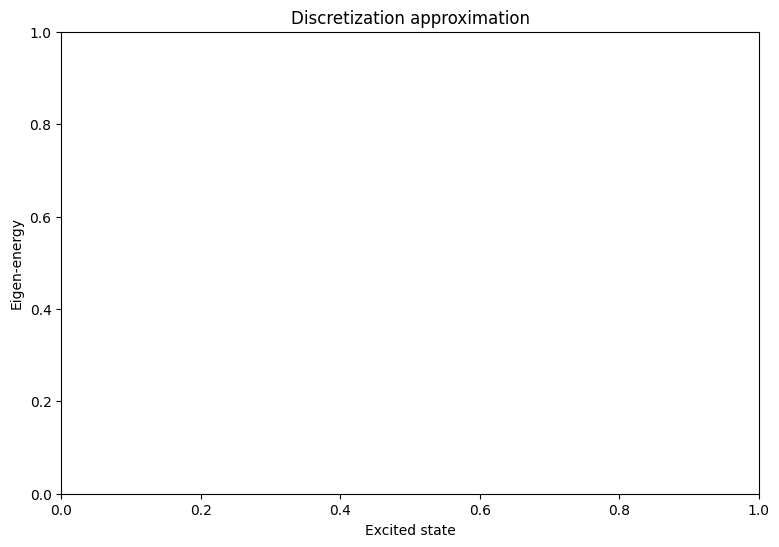

In [ ]:
# For linear algebra calculations
import numpy as np
from numpy import linalg as LA

# For constants
import scipy as sci
from scipy import constants

# For plotting
import matplotlib.pyplot as plt

def discretization(L, Steps, m, alpha):
    # define the steo size
    a = L / Steps

    J = constants.hbar**2 / (2 * m * a**2)

    # introduce matrix
    #   ->  -J + 2 * J (diagonal index) - J
    Hamiltonian = [0] * (Steps+1)

    for i in range(Steps+1):
        row = [0] * (Steps+1)

        for j in range(Steps+1):
            if i == j:
                row[j] = 2 * J + V(i, a, alpha)
            if abs(j-i) == 1:
                row[j] = - J
        
        Hamiltonian[i] = row
        
    # calculate eigenvalues
    #   ->  calculate wave function psi_n at each discretization step
    eigenenergie_Vector = LA.eig(Hamiltonian)

    return eigenenergie_Vector

# potential for linear potential increase with linear term (alpha)
def V(n,a,alpha):
    return n * a * alpha

N = 50
result = discretization(1,N,0.05,0.05)

# fig, ax = plt.subplots(figsize = (9, 6))
# ax.set_title('Discretization approximation')
# ax.set_xlabel('Excited state')
# ax.set_ylabel('Eigen-energy')
# ax.scatter(N+1,(result.eigenvalues),label='Energy diference')
# ax.plot( result.eigenvalues, 1, label='Tunnel amplitude',color='k')